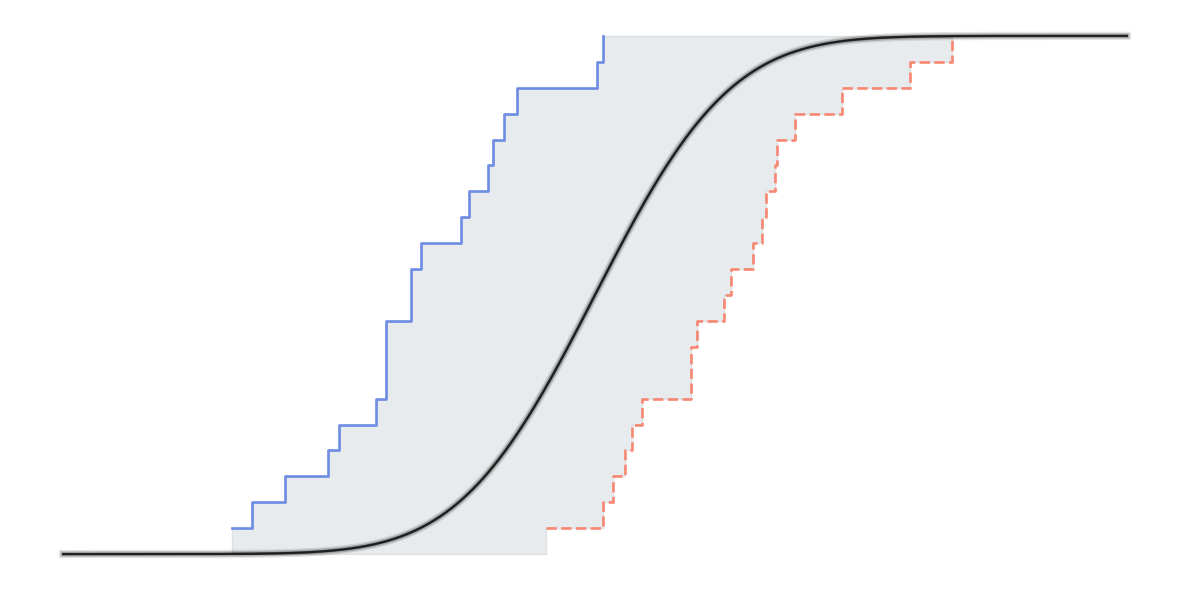

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Set white canvas
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create data for ECDFs
np.random.seed(42)
data_left = np.sort(np.random.normal(loc=-1.5, scale=1, size=20))
data_right = np.sort(np.random.normal(loc=1.5, scale=1, size=20))

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

x1, y1 = ecdf(data_left)
x2, y2 = ecdf(data_right)

# Common x-axis
x_all = np.sort(np.unique(np.concatenate((x1, x2))))
y1_interp = np.searchsorted(x1, x_all, side='right') / len(x1)
y2_interp = np.searchsorted(x2, x_all, side='right') / len(x2)

# Artistic ECDFs
ax.step(x1, y1, where='post', color='royalblue', alpha=0.7, linewidth=2)
ax.step(x2, y2, where='post', color='tomato', alpha=0.7, linewidth=2, linestyle='--')

# Fill between steps (layered glow effect)
ax.fill_between(x_all, y1_interp, y2_interp, step='post', color='slategray', alpha=0.08)
ax.fill_between(x_all, y1_interp, y2_interp, step='post', color='slategray', alpha=0.08)

# Glowing true CDF
x_vals = np.linspace(-5, 5, 1000)
true_cdf = norm.cdf(x_vals, loc=0, scale=1)
for lw, alpha in zip([6, 4, 2], [0.1, 0.2, 0.4]):
    ax.plot(x_vals, true_cdf, color='black', linewidth=lw, alpha=alpha)
ax.plot(x_vals, true_cdf, color='black', linewidth=1.5, alpha=0.7)

# Remove all spines and ticks
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

# Layout
plt.tight_layout()
plt.show()

